#### Download the dataset from [here](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310007901) 

#### <u>About the dataset</u>

This dataset is published by statistics canada
#### <u>References </u>

Statistics Canada. Table 23-10-0079-01  Operating and financial statistics for major Canadian airlines, monthly

https://www.geeksforgeeks.org/machine-learning/augmented-dickey-fuller-adf/

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf

In [174]:
import matplotlib.pyplot as plt
import pandas as pd

In [175]:
df = pd.read_csv('dataset/dataset.csv')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4634 entries, 0 to 4633
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   REF_DATE                              4634 non-null   object 
 1   GEO                                   4634 non-null   object 
 2   DGUID                                 4634 non-null   object 
 3   Operational and financial statistics  4634 non-null   object 
 4   UOM                                   4634 non-null   object 
 5   UOM_ID                                4634 non-null   int64  
 6   SCALAR_FACTOR                         4634 non-null   object 
 7   SCALAR_ID                             4634 non-null   int64  
 8   VECTOR                                4634 non-null   object 
 9   COORDINATE                            4634 non-null   float64
 10  VALUE                                 4105 non-null   float64
 11  STATUS           

__In total there are 15 columns. For the analysis only `Date` and `Passengers count` is needed__

In [177]:
df

,REF_DATE,GEO,DGUID,Operational and financial statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.10,1895.0,NaN,NaN,NaN,0
1,1981-01,Canada,2021A000011124,Passenger-kilometres,Number,223,thousands,3,v11744,1.20,3411545.0,NaN,NaN,NaN,0
2,1981-01,Canada,2021A000011124,Kilograms of goods,Kilograms,192,thousands,3,v11745,1.30,29091.0,NaN,NaN,t,0
3,1981-01,Canada,2021A000011124,Goods tonne-kilometres,Tonne-kilometres,285,thousands,3,v11746,1.40,64084.0,NaN,NaN,t,0
4,1981-01,Canada,2021A000011124,Hours flown,Number,223,thousands,3,v11747,1.50,53.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629,2025-10,Canada,2021A000011124,Available seat-kilometres,Number,223,thousands,3,v107645152,1.10,23523454.0,NaN,NaN,NaN,0
4630,2025-10,Canada,2021A000011124,Load factor,Percent,239,units,0,v107645153,1.11,83.3,NaN,NaN,NaN,1
4631,2025-10,Canada,2021A000011124,Hours flown,Number,223,thousands,3,v11747,1.50,183.0,NaN,NaN,NaN,0
4632,2025-10,Canada,2021A000011124,Turbo fuel consumed,Litres,203,thousands,3,v11748,1.60,643354.0,NaN,NaN,NaN,0


### Data Cleaning

* __Since only `Passengers` are needed from `Operational and financial statistics` it is selected from the column to make a new `Dataframe`__

* __The scalar Factor of `Passengers` are in `Thousands` so all the values are multiplied by `1000`__

* __`REF_DATE` is converted to `Pandas DataTimeIndex`__

* __All the columns are dropped except `PASSENGER` and `REF_DATE`__

In [178]:
df = df[df["Operational and financial statistics"] == "Passengers"].reset_index(drop= True)
df["PASSENGERS"] = df["VALUE"] * 1000
df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])
df = df.sort_values("REF_DATE")
df = df.set_index("REF_DATE")

In [179]:
df

,GEO,DGUID,Operational and financial statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,PASSENGERS
REF_DATE,,,,,,,,,,,,,,,
1981-01-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,1895.0,NaN,NaN,NaN,0,1895000.0
1981-02-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,1852.0,NaN,NaN,NaN,0,1852000.0
1981-03-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,2130.0,NaN,NaN,NaN,0,2130000.0
1981-04-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,2083.0,NaN,NaN,NaN,0,2083000.0
1981-05-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,2118.0,NaN,NaN,NaN,0,2118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,7546.0,NaN,NaN,NaN,0,7546000.0
2025-07-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,8295.0,NaN,NaN,NaN,0,8295000.0
2025-08-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,8136.0,NaN,NaN,NaN,0,8136000.0


In [180]:
df.drop(['GEO', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'Operational and financial statistics', 'SCALAR_FACTOR', 'VALUE'],  axis=1, inplace=True)

In [181]:
df

,PASSENGERS
REF_DATE,
1981-01-01,1895000.0
1981-02-01,1852000.0
1981-03-01,2130000.0
1981-04-01,2083000.0
1981-05-01,2118000.0
...,...
2025-06-01,7546000.0
2025-07-01,8295000.0
2025-08-01,8136000.0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 1981-01-01 to 2025-10-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PASSENGERS  538 non-null    float64
dtypes: float64(1)
memory usage: 8.4 KB


In [183]:
df.isna().sum()

PASSENGERS    0
dtype: int64

In [184]:
df.index.is_monotonic_increasing

True

In [185]:
df["PASSENGERS"].describe()

count    5.380000e+02
mean     3.112251e+06
std      1.899489e+06
min      2.130000e+05
25%      1.825750e+06
50%      2.208000e+06
75%      3.489000e+06
max      8.463000e+06
Name: PASSENGERS, dtype: float64

### Visualization

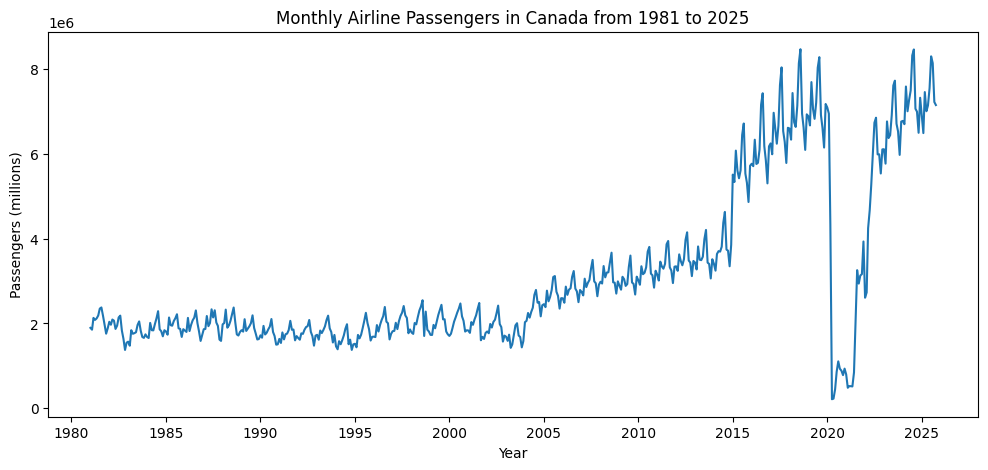

In [186]:
plt.figure(figsize= (12, 5))
plt.plot(df.index, df["PASSENGERS"])
plt.title("Monthly Airline Passengers in Canada from 1981 to 2025")
plt.xlabel("Year")
plt.ylabel("Passengers (millions)")
plt.show()

In [187]:
from statsmodels.tsa.seasonal import seasonal_decompose

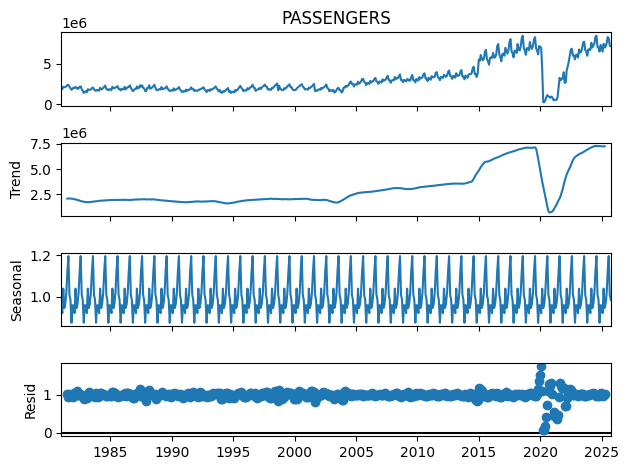

In [189]:
decompose = seasonal_decompose(df["PASSENGERS"], model="multiplicative", period=12)
decompose.plot()
plt.show()

### Augmented Dickey-Fuller (ADF) test

In [190]:
from statsmodels.tsa.stattools import adfuller

In [191]:
adf_result = adfuller(df["PASSENGERS"])

print("ADF Statistics: ", adf_result[0])
print("p-value: ", adf_result[1])

ADF Statistics:  -1.6291406046954466
p-value:  0.4679405871362664


__The The p value is < 0.05 meaning the series is non-stationary.__

## Seasonal Differencing

In [199]:
df_sesnl = df["PASSENGERS"].diff(12).dropna()

In [201]:
adf_result = adfuller(df_sesnl)

print("ADF Statistics: ", adf_result[0])
print("p-value: ", adf_result[1])

ADF Statistics:  -5.895510914555765
p-value:  2.857715138148367e-07


__The p value is > 0.05 which means the series is now stationary__

___Since one seasonal differencing was enough D = 1___

d = 0

## Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

The ACF plot can provide answers to the following questions:

* Is the observed time series white noise / random?
* Is an observation related to an adjacent observation, an observation twice-removed, and
so on?
* Can the observed time series be modeled with an MA model? If yes, what is the order?

The PACF plot can provide answers to the following questions:

* Can the observed time series be modeled with an AR model? If yes, what is the order?

In [202]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

/var/folders/0z/g6c0qmm52072pt9jkpt9y58h0000gn/T/ipykernel_18278/3201995068.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


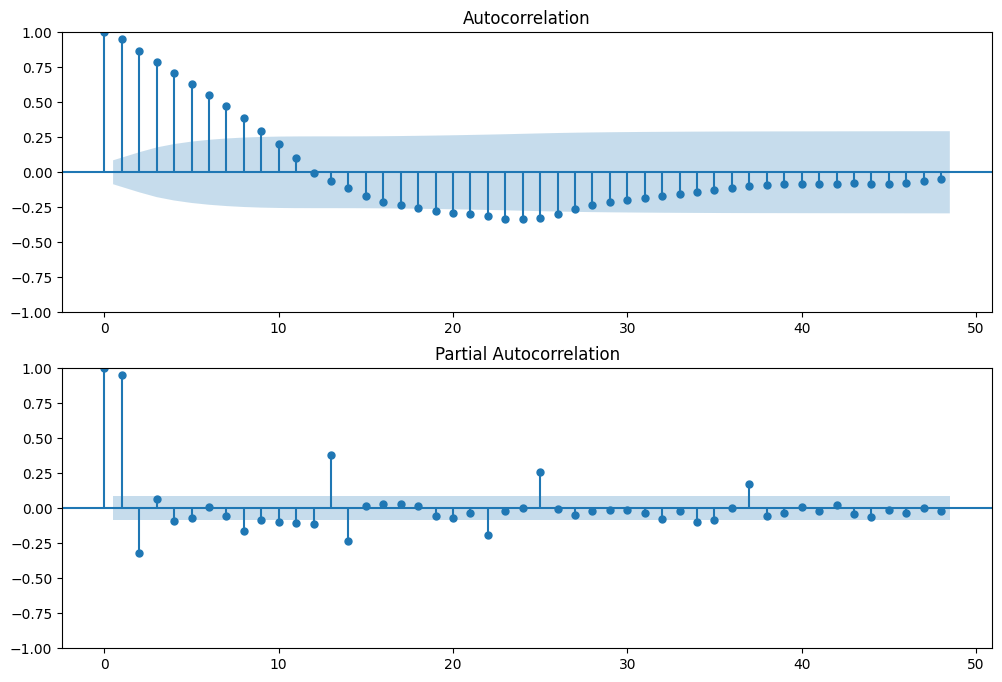

In [208]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_sesnl, lags=48, ax=ax[0])
plot_pacf(df_sesnl, lags=48, ax=ax[1])
fig.show()

From the plots it is identified that:

* p = 1
* P = 1
* q = 1
* Q = 0 

In [210]:
train = df.iloc[:-24]
test = df.iloc[-24]

In [211]:
print(train.tail())

            PASSENGERS
REF_DATE              
2023-06-01   6911000.0
2023-07-01   7607000.0
2023-08-01   7722000.0
2023-09-01   6706000.0
2023-10-01   6524000.0


In [213]:
print(test.head())

PASSENGERS    5972000.0
Name: 2023-11-01 00:00:00, dtype: float64


Modelling in SARIMA Model

SARIMA = Seasonal AutoRegressive Integrated Moving Average

ARIMA (p,d,q) → non-seasonal part

Seasonal (P,D,Q,s) → seasonal part

Order  = (1, 0, 1)
Seasonal_order = (1, 1, 0, 12)

In [209]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [214]:
model = SARIMAX(
    train["PASSENGERS"], order=(1, 0, 1),
    seasonal_order=(1, 1, 0, 12)
    )

/Users/naji/Documents/My Projects/aviation_forecasting_canada/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/naji/Documents/My Projects/aviation_forecasting_canada/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [215]:
model_fit = model.fit()
print(model_fit.params)

ar.L1       9.343897e-01
ma.L1       3.869424e-01
ar.S.L12   -4.486547e-01
sigma2      1.354074e+11
dtype: float64


In [216]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          PASSENGERS   No. Observations:                  514
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood               -7109.170
Date:                             Thu, 01 Jan 2026   AIC                          14226.340
Time:                                     22:35:34   BIC                          14243.214
Sample:                                 01-01-1981   HQIC                         14232.960
                                      - 10-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9344      0.009     98.983      0.000       0.916       0.953
ma.L1          0.3869      